In [4]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv')

# Inspeccionar las primeras filas
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

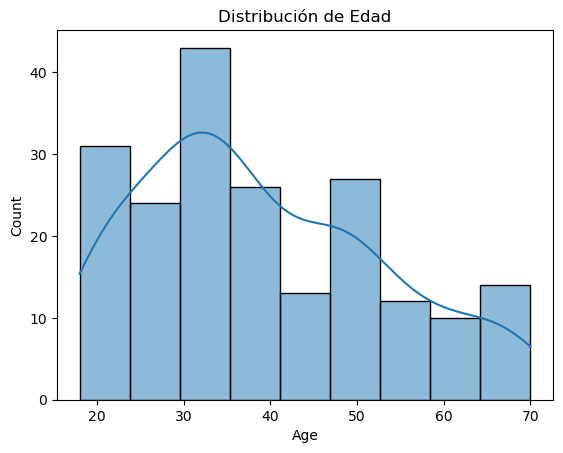

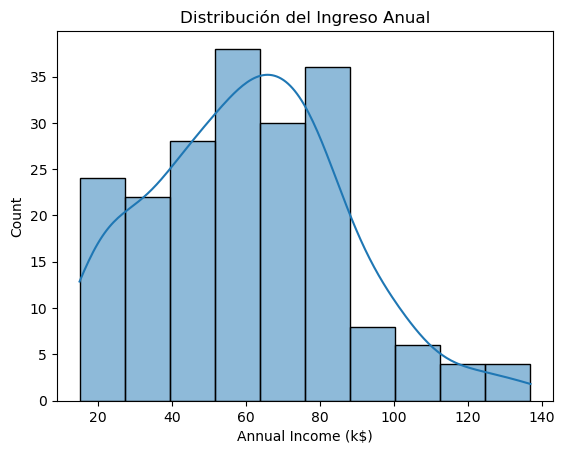

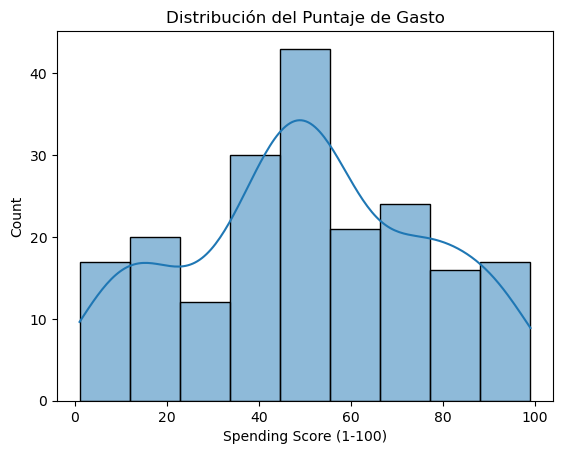

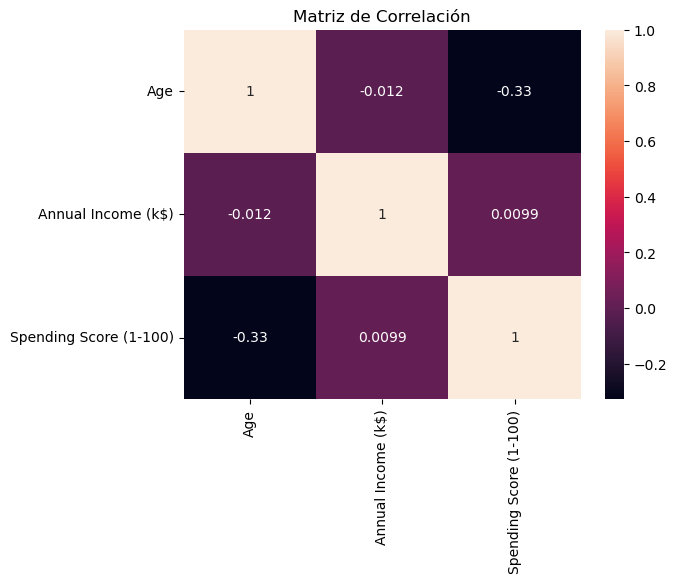

In [6]:
# Análisis básico del dataset
print(data.info())
print(data.describe())

# Visualizar las distribuciones
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las columnas relevantes
sns.histplot(data['Age'], kde=True).set_title('Distribución de Edad')
plt.show()

sns.histplot(data['Annual Income (k$)'], kde=True).set_title('Distribución del Ingreso Anual')
plt.show()

sns.histplot(data['Spending Score (1-100)'], kde=True).set_title('Distribución del Puntaje de Gasto')
plt.show()

# Matriz de correlación
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True)
plt.title('Matriz de Correlación')
plt.show()


In [4]:
import pandas as pd

# Cargar el dataset desde la ruta
data = pd.read_csv('Mall_Customers.csv')  # Si el archivo está en el mismo directorio

# Verificar la carga de los datos
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [25]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas relevantes
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar las columnas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Convertir el resultado normalizado a un DataFrame 
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Mostrar las primeras filas de las características normalizadas
print(scaled_data.head())



        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


In [37]:
# Codificar género 
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


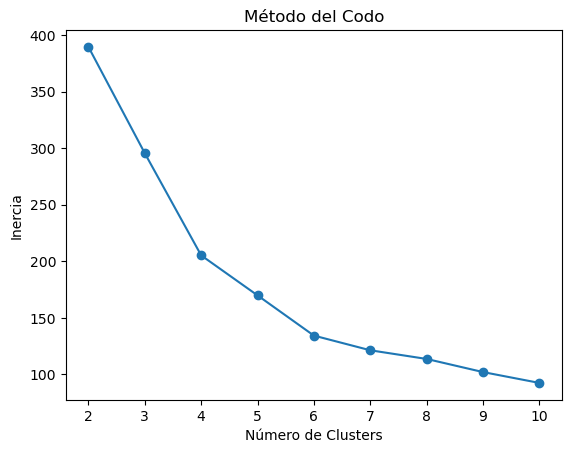

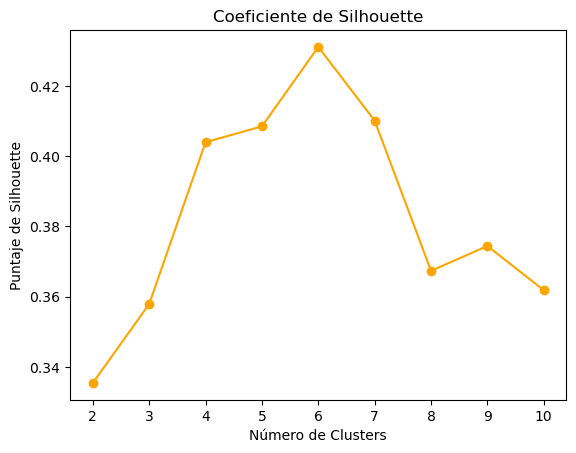

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1     NaN   19                  15                      39   
1           2     NaN   21                  15                      81   
2           3     NaN   20                  16                       6   
3           4     NaN   23                  16                      77   
4           5     NaN   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [39]:
# Importar las bibliotecas necesarias
import os
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Establecer la variable de entorno OMP_NUM_THREADS=1 para evitar el memory leak en Windows
os.environ['OMP_NUM_THREADS'] = '1'

# Ignorar la advertencia específica de KMeans
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak.*")

# Probar diferentes números de clusters para encontrar el óptimo (Método del Codo y Silhouette Score)
inertia = []  # Para el método del codo
silhouette_scores = []  # Para el coeficiente de Silhouette
range_n_clusters = range(2, 11)

# Usar el modelo de K-means para diferentes números de clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)  # scaled_features son los datos normalizados
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Gráfica del Método del Codo
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Gráfica de Coeficientes de Silhouette
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silhouette')
plt.show()

# Entrenar el modelo K-means con el número de clusters óptimo (por ejemplo, 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Agregar las etiquetas de los clusters al dataset original
data['Cluster'] = kmeans.labels_

# Mostrar las primeras filas del dataset con las etiquetas de los clusters
print(data.head())


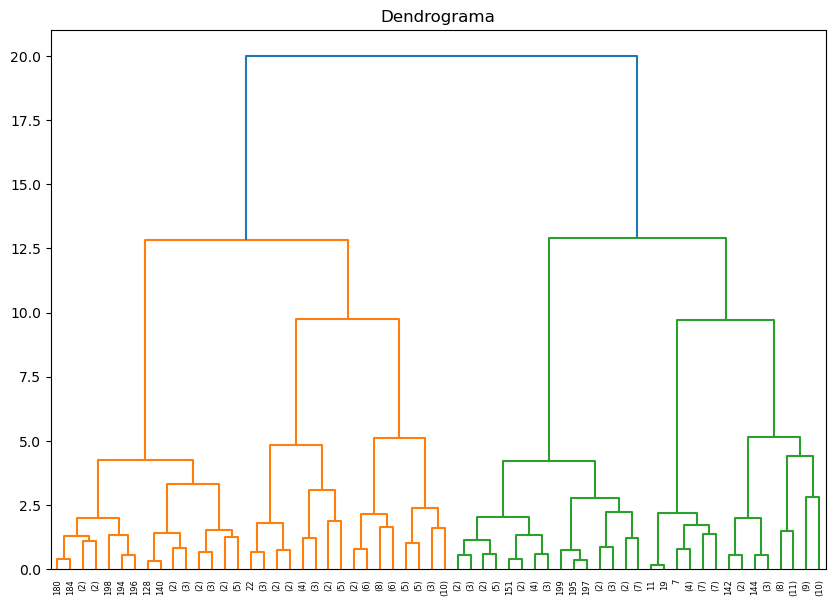

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Crear el dendrograma
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma')
plt.show()

# Entrenar Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
data['Hierarchical Cluster'] = hierarchical.fit_predict(scaled_features)


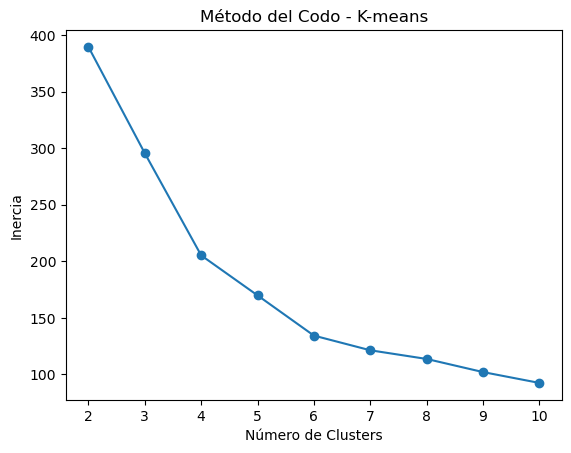

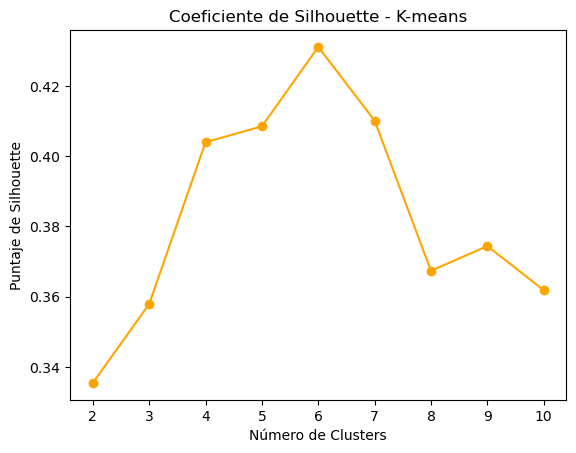

Dataset con K-means:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   K-means Cluster  
0                2  
1                2  
2                2  
3                2  
4                2  
Dataset con Clustering Jerárquico:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4  

In [45]:
# Importar las bibliotecas necesarias
import os
import warnings
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Establecer la variable de entorno OMP_NUM_THREADS=1 para evitar el memory leak en Windows
os.environ['OMP_NUM_THREADS'] = '1'

# Ignorar la advertencia específica de KMeans
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak.*")

# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv')  # Asegúrate de que la ruta sea correcta

# Eliminar la columna CustomerID (no relevante para el clustering)
data_clean = data.drop(columns=['CustomerID'])

# Seleccionar las características numéricas relevantes para el clustering
features = data_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar las características para que todas tengan la misma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Método del Codo y Silhouette Score para determinar el número de clusters óptimos (K-means)
inertia = []  # Para el método del codo
silhouette_scores = []  # Para el coeficiente de Silhouette
range_n_clusters = range(2, 11)

# Probar diferentes números de clusters para encontrar el óptimo
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Gráfica del Método del Codo
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método del Codo - K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Gráfica de Coeficientes de Silhouette
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silhouette - K-means')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje de Silhouette')
plt.show()

# Entrenar el modelo K-means con el número de clusters óptimo (por ejemplo, 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Agregar las etiquetas de los clusters al dataset original
data['K-means Cluster'] = kmeans.labels_

# Mostrar las primeras filas del dataset con las etiquetas de los clusters
print("Dataset con K-means:")
print(data.head())

#----------------------------------
# Entrenamiento de Clustering Jerárquico
#----------------------------------

# Para versiones anteriores a scikit-learn 1.0 (si tienes la versión 1.0 o posterior, usa affinity='euclidean')
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')  # No es necesario 'affinity' con 'ward'
data['Hierarchical Cluster'] = hierarchical.fit_predict(scaled_features)

# Mostrar las primeras filas del dataset con las etiquetas de los clusters jerárquicos
print("Dataset con Clustering Jerárquico:")
print(data.head())


In [49]:
from sklearn.metrics import calinski_harabasz_score

# Calcular métricas
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(scaled_features, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Silhouette Score: 0.4039582785148566
Calinski-Harabasz Index: 125.67639662405028
